In [1]:
from sympy import symbols, solve, N, cos, sin, pi, sqrt, Poly
import numpy as np
import matplotlib.pyplot as plt

g=9.81
theta = 2*pi/360*30
n=0.07

aR=0.05
mR=1.5
dR=0.25
alphaR=10/360*2*pi

a, bma, c = symbols('a bma c', positive=True, real=True) #bma = b-a

eqs = [a**2+(a+bma)**2-2*a*(a+bma)*cos(pi/3)-c**2, a**2+(a+bma)**2-2*a*(a+bma)*cos(pi/3-theta)-(c*(1-n))**2]
solutions = solve(eqs, [c, bma], dict=True)
b = solutions[0][bma].evalf(subs={a:aR}) + aR
c = solutions[0][c].evalf(subs={a:aR})
print(f"a: {100*N(aR,3)}cm, b: {100*N(b,3)}cm, c: {N(100*c,3)}cm")

m, d, k = symbols('m d k', positive=True, real=True)
solutions = solve([m*g/4*d*cos(alphaR+pi/6)*2+2*0.5*k*(alphaR**2)-m*g/4*d*cos(pi/6)*2], k, dict=True)
kR = N(solutions[0][k].evalf(subs={m:mR, d:dR}),3)
print(f"m: {mR}kg, d: {dR}m, angle offset: {np.rad2deg(float(alphaR))}deg, k: {kR}N/m")

F, gamma = symbols('F gamma', positive=True, real=True)
solutions = solve([theta*kR-F*a*sin(gamma), -b**2+a**2+(c*(1-n))**2-2*a*c*(1-n)*cos(gamma)], [F, gamma], dict=True)
fR = solutions[1][F].subs({a:aR, k:kR}).evalf()
print(f"force: {N(fR,3)}N")


a: 5.00cm, b: 31.3cm, c: 29.1cm
m: 1.5kg, d: 0.25m, angle offset: 10.0deg, k: 6.04N/m
force: 109N


In [324]:

D0 = 0.015
p = 5 * 101325
mesh_angle = pi/4
fmax = (pi*(D0**2)*p/4*(3*(cos(mesh_angle)**2)-1)).evalf()
print(f"max force: {N(fmax,3)}")

print(f"strain: {N(100*(1-sqrt( (1/(3* (cos(mesh_angle)**2) )) * (1 + (4*(sin(mesh_angle)**2)/ (pi*(D0**2)) *(fmax/p) )))).evalf(),3)}%")

max force: 44.8
strain: 8.71%


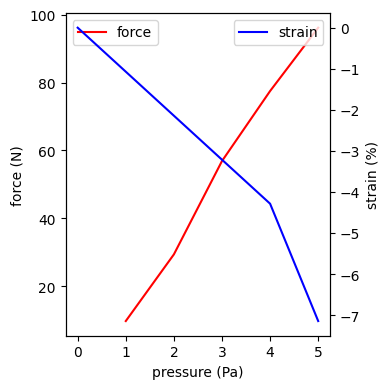

In [303]:
p = [1, 2, 3, 4, 5]
f = np.array([1, 3, 5.8, 7.9, 9.8])*9.81
lp = [0, 4, 5]
strain = (np.array([0.28, 0.268, 0.26])-0.28)/0.28*100
fig, ax1 = plt.subplots(figsize=(4, 4))
ax2 = ax1.twinx()
ax1.set_xlabel('pressure (Pa)')
ax1.plot(p, f, label="force", color='r')
ax2.plot(lp, strain, label="strain", color='b')
ax2.set_ylabel('strain (%)')
ax1.set_ylabel('force (N)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()


In [321]:
((40-(12/2))**2+(50**2))**0.5


28.3
22
21.5

print((21.5-28.3)/28.3)

k = (0.5*9.81*0.16)/np.deg2rad(30)
print(k)

-0.2402826855123675
1.4988575920622338


In [134]:
a = 50
x = 74.16
l0 = sqrt(a**2+x**2-2*a*x*cos(np.deg2rad(120)))
l1 = sqrt(a**2+x**2-2*a*x*cos(np.deg2rad(170)))
s= (l1-l0)/l0
print(f"l0: {l0}, l1: {l1}, strain: {s}")

l0: 108.202151549773, l1: 123.705456210866, strain: 0.143280927773067
